#### - 푸리에 변환은 다양한 필터의 주파수 특성을 분석하는 데 사용
#### - 이미지의 경우, 주파수 영역을 찾기 위해 2D Discrete Fourier Transform(DFT)를 사용
#### - Fast Fourier Transform(FFT)라는 고속 알고리즘은 이미지 처리 또는 신호 처리 사용
#### - 푸리에 변환을 x와 y의 방향으로 하면 이미지의 주파수를 얻을 수 있음
#### - 이미지에서 진폭이 크게 변하는 곳은 가장자리 부분이나 노이즈가 있는 부분
#### - 가장자리와 노이즈는 이미지에서 고주파 부분
#### - 진폭에 큰 변화가 없으면 저주파 성분

### 이미지에 주파수 스펙트럼을 사용하는 이유

- 이미지의 품질을 평가하기 위해
- 이미지의 특정 주파수 성분을 제거하여 이미지를 개선하기 위해
- 이미지의 특정 주파수 성분을 강조하여 이미지를 강조하기 위해

### 영주파 성분
- 이미지의 가장자리에 위치하는 주파수 성분
- 이미지의 전체적인 모양 결정

### 스펙트럼
- 이미지의 주파수 성분을 나타내는그래프
- 스펙트럼의 x축은 주파수를, y축은 크기를 나타냄 

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('./img/boy_face.jpg',0)

In [7]:
f = np.fft.fft2(img)  # 이미지의 빠른 푸리에 변환 계산. FFT는 이미지를 공간 영역에서 주파수 영역으로 변환
fshift = np.fft.fftshift(f)  # FFT의 영주파 성분을 스펙트럼의 중앙으로 이동시킴
dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT) # 이미지의 차원 이산 푸리에 변환(복소수 형식 출력)
dft_shift = np.fft.fftshift(dft)

# 영주파 성분을 스펙트럼의 중앙으로 이동시키는 이유: 이미지의 전체적인 모양을 파악하기 쉬움. 이미지의 특정 주파수 성분을 분석하기 쉬움.

# 이미지의 주파수 스펙트럼을 사용하여 이미지의 특정 주파수 성분을 제거하려면, 해당 주파수 성분의 크기를 0으로 설정하는 방식으로 이미지의 특정 주파수 성분을 제거하여 이미지가 개선될 수 있음.

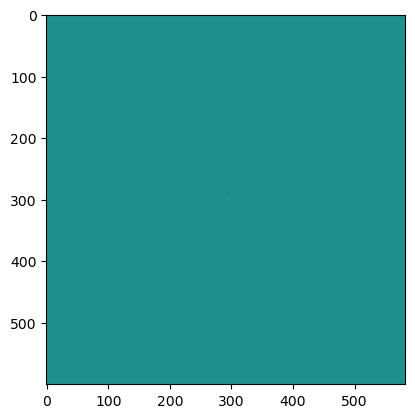

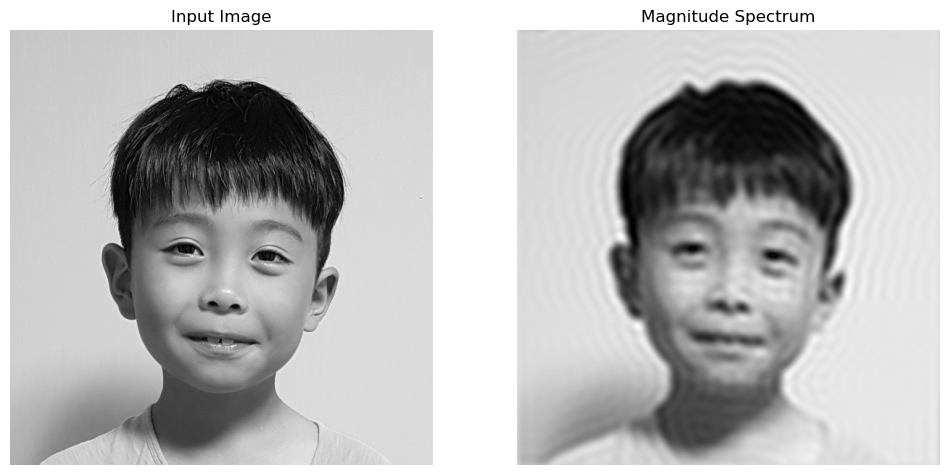

In [8]:
# 이미지에서 고주파 부분 제거
# - 저주파 : 높은값(1)로 마스크, 고주파 : 0  

# 이미지에서 고주파 부분을 제거하는 방법을 보여줌. 고주파 부분을 제거하면 이미지의 가장자리가 부드러워짐.

rows, cols = img.shape # 입력 이미지의 크기를 가져옴
crow,ccol = round(rows/2), round(cols/2) # 이미지의 중심 픽셀 위치. 마스크는 이미지의 중심에 적용해야 효과가 좋음

# 30*30 마스크 생성. 이미지의 가장자리를 부드럽게 하기 위해 사용됨. 마스크의 크기가 이미지의 가장가리 크기보다 충분히 커야 하기 때문에, 이미지의 크기(501, 398)보다 큰 30*30으로 설정.
# 마스크의 중심은 이미지의 중심에 있음. 마스크의 나머지 부분은 0으로 채워짐
# 마스크를 먼저 생성하고, 가운데 네모를 1로 나머지를 0
# 마스크는 이미지의 일부 영역만 선택하기 위해 사용됨. 
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1

# 마스크의 0번째 채널.  마스크의 크기 스펙트럼을 부여좀. 
plt.imshow(mask[:,:,0])

# 마스크와 역 DFT를 적용
# 입력 이미지의 주파수 스펙트럼 * 마스크
# 마스크에 의해 조정된 주파수 스펙트럼이 생성됨
# 주파수 스펙트럼을 공간 영역으로 변환
fshift = dft_shift*mask

# 이동된 FFT의 크기 스펙트럼을 보여줌. 0주파 성분이 이미지의 중앙에 위치하도록 함.마스크를 적용하기 전에 이미지의 주파수 영역을 보여줌
plt.imshow(fshift[:,:,0])

# 마스크를 사용하여 FFT의 크기 스펙트럼을 곱함. 마스크의 값이 1인 부분은 크기 스펙트럼의 값을 유지, 마스크의 값이 0인 부분은 크기 스펙트럼 값을 0으로 설정
# 마스크는 크기 스펙트럼의 값을 조정하여 이미지의 가장자리를 부드럽게 함.
# 역 주파수 이동. 수정된 주파수 스펙트럼(fshift)에 역 주파수 이동 적용
f_ishift = np.fft.ifftshift(fshift)

# fshift에 역 이산 푸리에 변환. 주파수 영역 표현을 공간 영역으로 변환하여 수정된 주파수 스펙트럼에서 원본 이미지 재구성
img_back = cv2.idft(f_ishift)

# 크기와 위상 정보를 모두 나타내는 복소수 배열에서 크기를 추출
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# 역 FFT를 사용해서 이미지를 재구성

plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(122), plt.imshow(img_back,cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show() # 재구성된 이미지 플롯.이미지의 고주파 부분이 제거된 것 확인 가능. 이미지의 가장자리가 부드러워졌음.


In [9]:
# Performance Optimization of DFT

# 보통, OpenCV의 cv2.dft()와 cv2.idft() 함수는 Numpy 보다 빠름
# 하지만 Numpy 함수는 좀 더 유저친화적임
 

# DFT 연산의 성능은 일부 배열 크기에서 더 좋음
# 이는 배열의 크기가 2배 일 때 더 빠름. 배열의 크기가 2배, 3배, 5배인 경우도 효율적
# 코드의 성능에 대해 걱정이라면, 배열의 크기를 DFT를 찾기 이전에
# 어떠한 최적의 크기(제로-패딩으로)로 수정하면 됨
# OpenCV에서는, 직접 제로패딩을 해야함
# Numpy에서는, FFT 계산의 새 크기를 지정하면 자동으로 0으로 패딩됨

# OpenCV는 cv2.getOptimalDFTSize()를 통해 최적의 크기 찾을 수 있음
# cv2.dft()와 np.fft.fft2() 모두에 적용


# numpy와 달리, opencv는 제로 패딩을 자동으로 처리하지 않기 때문에 FFT를 수행할 떄는 제로 패딩을 수행해야 함.
# 제로 패딩을 FFT의 성능을 개선하기 위해 사용됨. 입력 배열의 크기가 2의 거듭제곱일 때 효율적. 

img = cv2.imread('./img/boy_face.jpg',0)
rows,cols = img.shape
print(rows,cols)
# 입력 이미지의 크기를 가져옴

nrows = cv2.getOptimalDFTSize(rows) 
ncols = cv2.getOptimalDFTSize(cols)
print(nrows,ncols)
# OpenCV의 cv2.getOptimalDFTSize()함수를 사용하여 최적의 크기를 찾음
# DFT의 크기는 2의 거듭제곱이어야 함. 따라서 입력 이미지의 크기를 2의 거듭제곱으로 나누고 그 몫에 2를 곱하여 최적의 DFT 크기를 계산함.


# 0 패딩 생성
# - 커다란 0 배열을 만들어도 되고
# - 데이터를 복사하고 cv2.copyMakeBorder()를 사용해도 됨

# 0 패딩 생성 첫 번째 방법 - 큰 0 배열 만들기
# 입력 이미지의 크기에 맞는 크기의 0 배열을 생성함. 
# 600 * 583 -> 600*600 크기의 0 배열 생성
nimg = np.zeros((nrows,ncols))

# 입력 이미지를 0 배열에 복사. 입력 이미지의 크기가 2의 거듭제곱으로 늘어남.
nimg[:rows,:cols] = img  

# 0 패딩 생성 두 번째 - 데이터를 복사하고 cv2.copyMakeBorder()함수를 사용하여 0 패딩 생성
right = ncols - cols
bottom = nrows - rows
bordertype = cv2.BORDER_CONSTANT
nimg = cv2.copyMakeBorder(img,0,bottom,0,right,bordertype, value=0)


# numpy와 달리, opencv는 제로 패딩을 자동으로 처리하지 않기 때문에 FFT를 수행할 떄는 제로 패딩을 수행해야 함.
# 제로 패딩을 FFT의 성능을 개선하기 위해 사용됨. 입력 배열의 크기가 2의 거듭제곱일 때 효율적. 
# 이 방법을 사용하면 DFT 연산의 성능을 20% 향상시킬 수 있음

600 583
600 600


다양한 필터의 주파수 영역 특성의 시각화

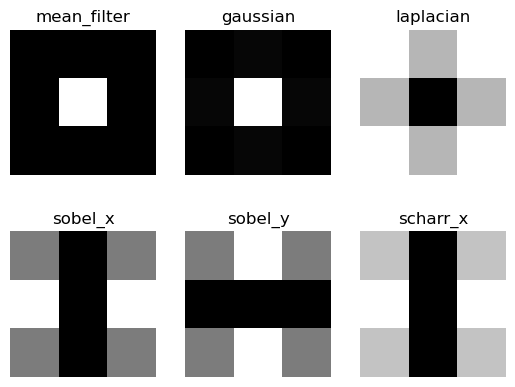

In [10]:

# 3*3 크기의 평균 필터 생성
mean_filter = np.ones((3,3))

# 3*3 가우시안 필터 생성
x = cv2.getGaussianKernel(3,3)
gaussian = x*x.T

# x 방향으로의 Scharr 필터 
scharr = np.array([[-3,0,3],
                  [-10,0,10],
                  [-3,0,3]])

# x 방향으로의 Sobel 필터
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                   [-1,0,1]])

# y 방향으로의 Sobel 필터
sobel_y = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

# 3*3 크리 라플라시안 필터
laplacian = np.array([[0,1,0],
                     [1,-4,1],
                     [0,1,0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', 'sobel_y', 'scharr_x']
# 생성된 필터의 이름과 목록 생성

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
# 각 필터를 FFT로 변환하고, 로그 스케일로 변환하여 시각적으로 더 쉽게 볼 수 있도록 함
# FFT 필터로 변환하는 이유 : 주파수 영역에서 필터의 특성을 시각적으로 확인 가능, 필터의 주파수 영역 성능을 수치적으로 평가 가능(필터의 크기 스펙트럼의 최대값을 측정하여 필터의 대역폭을 평가할 수 있음)

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(mag_spectrum[i],cmap='gray')
    plt.title(filter_name[i]), plt.axis('off')

plt.show()
# 각 필터의 FFT 변환 결과를 플롯.

각 필터가 차단하는 주파수 영역과 통화되는 영역 확인 가능

- 평균 필터는 모든 주파
- 가우시안 필터는 저주파수를 통과시키고, 고주파수 차단
- 샤르 필터는 x 방향으로의 높은 주파수 강조, y 방향으로의 높은 주파수 차단
- 소벨 필터는 x 방향과 y 방향의 높은 주파수를 모두 강조
- 라플라시안 필터는 높은 주파수 강조